<a href="https://colab.research.google.com/github/eduardocarbo/Biography/blob/main/%5BPractice_09%5D_SALESMAN_OPTIMIZATION_PROBLEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

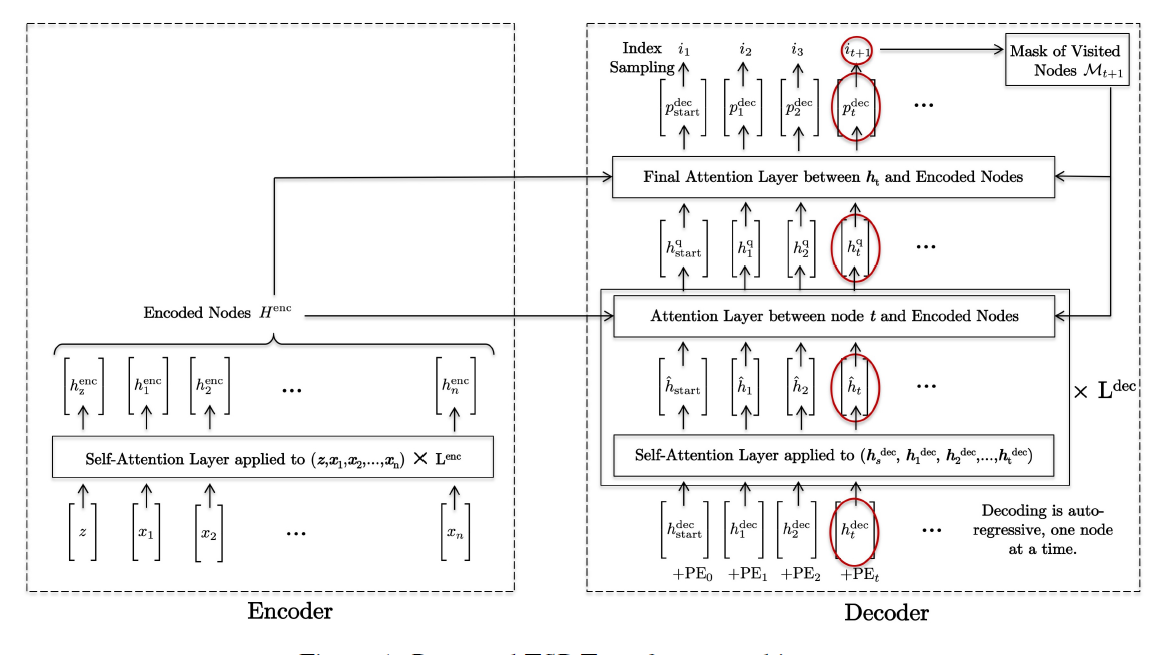

# Libreries for TSP Optimization problem

In [ ]:
# Uninstall the current PyTorch installation
!pip uninstall torch -y

# Reinstall PyTorch. This command installs the CPU version.
# If you need a GPU version, you should consult the PyTorch website for the correct installation command based on your CUDA version.
!pip install torch

# Now, try importing the modules again
import torch
import torch.nn as nn
import torch.nn.functional as F

print("PyTorch modules imported successfully!")

  Using cached torch-2.7.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (29 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.6.77-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.6.77-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.6.80-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.5.1.17-py3-none-manylinux_2_28_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.6.4.1-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.3.0.4-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.7.77-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.7.1.2-py3-none-manylinux2014_x8

# CODE for hardware, if working UPC or CPU


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


# DATA

In [ ]:
import pandas as pd
from google.colab import files
import io

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}"'.format(name=fn))
  # Read the CSV file into a pandas DataFrame
  df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), sep=';')
df.head(20)

Saving List_of_cities.csv to List_of_cities (1).csv
User uploaded file "List_of_cities (1).csv"


,Ciudad,País,Continente,Latitud,Longitud,Nueva York,Los Ángeles,Chicago,Houston,Filadelfia,Washington D.C.,Boston,San Francisco,Seattle,Miami
0,Nueva York,Estados Unidos,América del Norte,40.7128° N,74.0060° O,0.00,3936.21,1145.25,2273.66,129.48,328.31,306.11,4129.34,3862.88,1757.17
1,Los Ángeles,Estados Unidos,América del Norte,34.0522° N,118.2437° O,3936.21,0.00,2805.53,2206.37,3830.53,3693.62,4179.26,559.09,1546.15,3763.27
2,Chicago,Estados Unidos,América del Norte,41.8781° N,87.6298° O,1145.25,2805.53,0.00,1515.65,1074.31,952.97,1368.11,2983.11,2787.58,1929.42
3,Houston,Estados Unidos,América del Norte,29.7604° N,95.3698° O,2273.66,2206.37,1515.65,0.00,2229.75,1973.83,2597.71,2641.36,3043.46,1552.88
4,Filadelfia,Estados Unidos,América del Norte,39.9526° N,75.1652° O,129.48,3830.53,1074.31,2229.75,0.00,198.61,436.32,4023.84,3757.41,1635.88
5,Washington D.C.,Estados Unidos,América del Norte,38.9072° N,77.0369° O,328.31,3693.62,952.97,1973.83,198.61,0.00,634.11,3887.48,3621.06,1486.87
6,Boston,Estados Unidos,América del Norte,42.3601° N,71.0589° O,306.11,4179.26,1368.11,2597.71,436.32,634.11,0.00,4371.76,4105.33,2028.68
7,San Francisco,Estados Unidos,América del Norte,37.7749° N,122.4194° O,4129.34,559.09,2983.11,2641.36,4023.84,3887.48,4371.76,0.00,1092.82,4171.24
8,Seattle,Estados Unidos,América del Norte,47.6062° N,122.3321° O,3862.88,1546.15,2787.58,3043.46,3757.41,3621.06,4105.33,1092.82,0.00,4395.01
9,Miami,Estados Unidos,América del Norte,25.7617° N,80.1918° O,1757.17,3763.27,1929.42,1552.88,1635.88,1486.87,2028.68,4171.24,4395.01,0.00


In [ ]:
df.shape

# RANDOM NUMBER CITY & CITY START

In [ ]:
# Escoger a la azar el número de ciudades y por cual ciudad arranca y mosrtar en pantalla el nuevo cuadro
#-------------------------------------------------------------------------------------------------------------

import random

# Choose a random number of cities (e.g., between 5 and 15)
num_cities_to_select = random.randint(5, min(15, df.shape[0]))

# Randomly select the starting city index
starting_city_index = random.randint(0, df.shape[0] - 1)

# Select the rows corresponding to the chosen cities
# Start with the starting city, then select the remaining unique cities randomly
selected_city_indices = [starting_city_index]
remaining_indices = [i for i in range(df.shape[0]) if i != starting_city_index]
random.shuffle(remaining_indices)

# Add remaining cities until we have the desired number of unique cities
count = 1
for index in remaining_indices:
  if count < num_cities_to_select:
    selected_city_indices.append(index)
    count += 1
  else:
    break

# Ensure uniqueness (though the logic above should handle this) and shuffle again for randomness in display order
random.shuffle(selected_city_indices)

# Get the new DataFrame with the selected cities
new_df = df.iloc[selected_city_indices].copy()

print(f"Selected {num_cities_to_select} cities.")
print(f"Starting city index in original DataFrame: {starting_city_index}")
print("\nNew DataFrame with selected cities:")
new_df

# You can optionally reset the index of the new_df if you want
# new_df = new_df.reset_index(drop=True)
# print("\nNew DataFrame with reset index:")
# print(new_df)

Selected 6 cities.
Starting city index in original DataFrame: 3

New DataFrame with selected cities:


,Ciudad,País,Continente,Latitud,Longitud,Nueva York,Los Ángeles,Chicago,Houston,Filadelfia,Washington D.C.,Boston,San Francisco,Seattle,Miami,Ciudad_inicio
6,Boston,Estados Unidos,América del Norte,42.3601,71.0589,306.11,4179.26,1368.11,2597.71,436.32,634.11,0.00,4371.76,4105.33,2028.68,0
9,Miami,Estados Unidos,América del Norte,25.7617,80.1918,1757.17,3763.27,1929.42,1552.88,1635.88,1486.87,2028.68,4171.24,4395.01,0.00,0
3,Houston,Estados Unidos,América del Norte,29.7604,95.3698,2273.66,2206.37,1515.65,0.00,2229.75,1973.83,2597.71,2641.36,3043.46,1552.88,0
2,Chicago,Estados Unidos,América del Norte,41.8781,87.6298,1145.25,2805.53,0.00,1515.65,1074.31,952.97,1368.11,2983.11,2787.58,1929.42,0
4,Filadelfia,Estados Unidos,América del Norte,39.9526,75.1652,129.48,3830.53,1074.31,2229.75,0.00,198.61,436.32,4023.84,3757.41,1635.88,1
0,Nueva York,Estados Unidos,América del Norte,40.7128,74.0060,0.00,3936.21,1145.25,2273.66,129.48,328.31,306.11,4129.34,3862.88,1757.17,0


In [ ]:
# prompt: de new_df crear una columna de 1 y 0 donde 1 es la ciudad que escogio el usuario para arrancar y 0 el resto, el nombre de la columna se llama Ciudad_inicio.

new_df['Ciudad_inicio'] = new_df.apply(lambda row: 1 if row['Ciudad'] == df.iloc[starting_city_index]['Ciudad'] else 0, axis=1)

# Display the updated DataFrame
print("\nNew DataFrame with 'Ciudad_inicio' column:")
df = new_df
df


New DataFrame with 'Ciudad_inicio' column:


,Ciudad,País,Continente,Latitud,Longitud,Nueva York,Los Ángeles,Chicago,Houston,Filadelfia,Washington D.C.,Boston,San Francisco,Seattle,Miami,Ciudad_inicio
6,Boston,Estados Unidos,América del Norte,42.3601,71.0589,306.11,4179.26,1368.11,2597.71,436.32,634.11,0.00,4371.76,4105.33,2028.68,0
9,Miami,Estados Unidos,América del Norte,25.7617,80.1918,1757.17,3763.27,1929.42,1552.88,1635.88,1486.87,2028.68,4171.24,4395.01,0.00,1
3,Houston,Estados Unidos,América del Norte,29.7604,95.3698,2273.66,2206.37,1515.65,0.00,2229.75,1973.83,2597.71,2641.36,3043.46,1552.88,0
2,Chicago,Estados Unidos,América del Norte,41.8781,87.6298,1145.25,2805.53,0.00,1515.65,1074.31,952.97,1368.11,2983.11,2787.58,1929.42,0
4,Filadelfia,Estados Unidos,América del Norte,39.9526,75.1652,129.48,3830.53,1074.31,2229.75,0.00,198.61,436.32,4023.84,3757.41,1635.88,0
0,Nueva York,Estados Unidos,América del Norte,40.7128,74.0060,0.00,3936.21,1145.25,2273.66,129.48,328.31,306.11,4129.34,3862.88,1757.17,0


In [ ]:
df.columns

Index(['Ciudad', 'País', 'Continente', 'Latitud', ' Longitud', 'Nueva York',
       'Los Ángeles', 'Chicago', 'Houston', 'Filadelfia', 'Washington D.C.',
       'Boston', 'San Francisco', 'Seattle', 'Miami', 'Ciudad_inicio'],
      dtype='object')

In [ ]:
# prompt: en las columnas 'Latitud '  y ' Longitud', borrar los caracteres desde ° en adelante

df['Latitud'] = df['Latitud'].astype(str).str.split('°').str[0]
df[' Longitud'] = df[' Longitud'].astype(str).str.split('°').str[0]

df[['Latitud', ' Longitud']].head(10)

df.head(10)

,Ciudad,País,Continente,Latitud,Longitud,Nueva York,Los Ángeles,Chicago,Houston,Filadelfia,Washington D.C.,Boston,San Francisco,Seattle,Miami,Ciudad_inicio
6,Boston,Estados Unidos,América del Norte,42.3601,71.0589,306.11,4179.26,1368.11,2597.71,436.32,634.11,0.00,4371.76,4105.33,2028.68,0
9,Miami,Estados Unidos,América del Norte,25.7617,80.1918,1757.17,3763.27,1929.42,1552.88,1635.88,1486.87,2028.68,4171.24,4395.01,0.00,1
3,Houston,Estados Unidos,América del Norte,29.7604,95.3698,2273.66,2206.37,1515.65,0.00,2229.75,1973.83,2597.71,2641.36,3043.46,1552.88,0
2,Chicago,Estados Unidos,América del Norte,41.8781,87.6298,1145.25,2805.53,0.00,1515.65,1074.31,952.97,1368.11,2983.11,2787.58,1929.42,0
4,Filadelfia,Estados Unidos,América del Norte,39.9526,75.1652,129.48,3830.53,1074.31,2229.75,0.00,198.61,436.32,4023.84,3757.41,1635.88,0
0,Nueva York,Estados Unidos,América del Norte,40.7128,74.006,0.00,3936.21,1145.25,2273.66,129.48,328.31,306.11,4129.34,3862.88,1757.17,0


#DATAFRAME STRUCTURE

In [ ]:
df

,Ciudad,País,Continente,Latitud,Longitud,Nueva York,Los Ángeles,Chicago,Houston,Filadelfia,Washington D.C.,Boston,San Francisco,Seattle,Miami,Ciudad_inicio
6,Boston,Estados Unidos,América del Norte,42.3601,71.0589,306.11,4179.26,1368.11,2597.71,436.32,634.11,0.00,4371.76,4105.33,2028.68,0
9,Miami,Estados Unidos,América del Norte,25.7617,80.1918,1757.17,3763.27,1929.42,1552.88,1635.88,1486.87,2028.68,4171.24,4395.01,0.00,1
3,Houston,Estados Unidos,América del Norte,29.7604,95.3698,2273.66,2206.37,1515.65,0.00,2229.75,1973.83,2597.71,2641.36,3043.46,1552.88,0
2,Chicago,Estados Unidos,América del Norte,41.8781,87.6298,1145.25,2805.53,0.00,1515.65,1074.31,952.97,1368.11,2983.11,2787.58,1929.42,0
4,Filadelfia,Estados Unidos,América del Norte,39.9526,75.1652,129.48,3830.53,1074.31,2229.75,0.00,198.61,436.32,4023.84,3757.41,1635.88,0
0,Nueva York,Estados Unidos,América del Norte,40.7128,74.006,0.00,3936.21,1145.25,2273.66,129.48,328.31,306.11,4129.34,3862.88,1757.17,0


# VISUALIZACIÓN

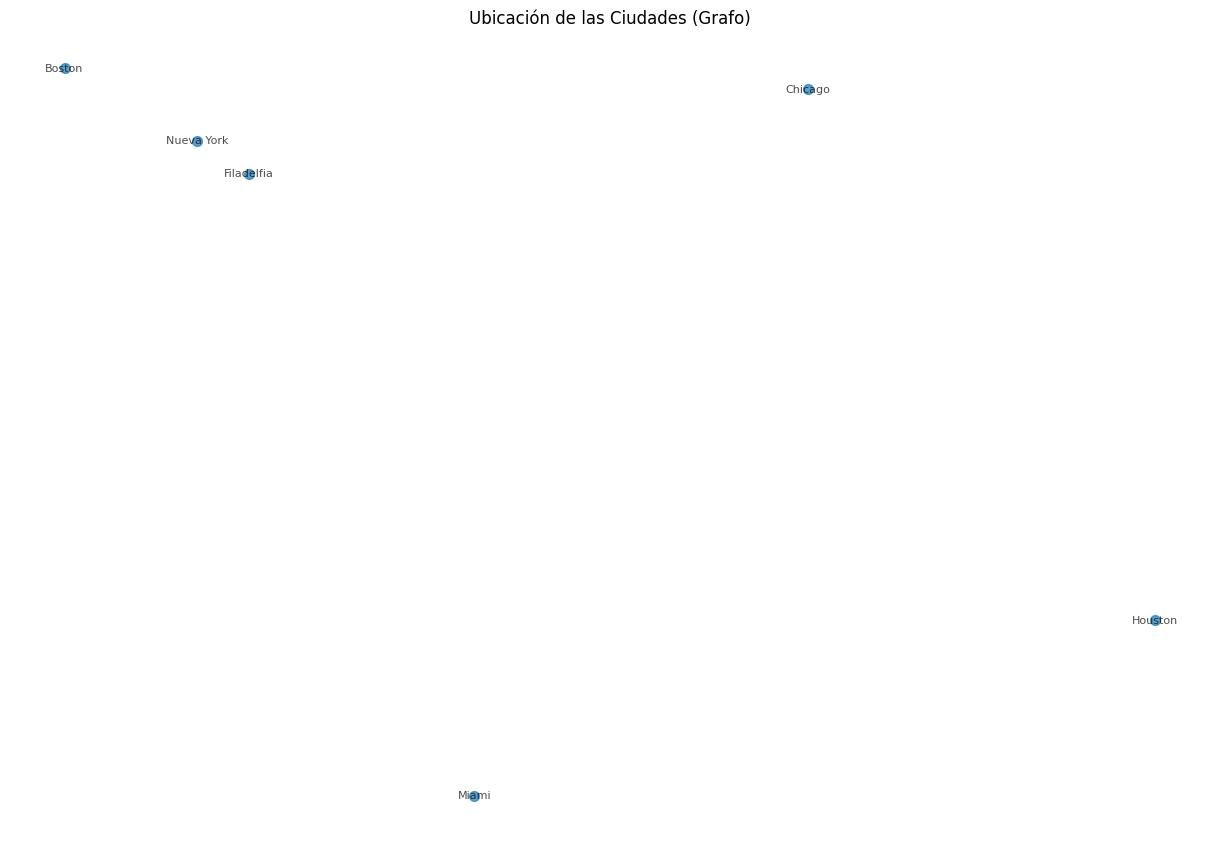

In [ ]:
# Se genera una gráfica de la ubicación de cada una de las ciudades de df estilo grafo

import networkx as nx
import matplotlib.pyplot as plt

# Ensure 'Latitud' and 'Longitud' are numeric types
df['Latitud'] = pd.to_numeric(df['Latitud'], errors='coerce')
df[' Longitud'] = pd.to_numeric(df[' Longitud'], errors='coerce')

# Drop rows with non-numeric coordinates if any failed conversion
df.dropna(subset=['Latitud', ' Longitud'], inplace=True)

# Create a graph
G = nx.Graph()

# Add nodes with positions
for index, row in df.iterrows():
    city = row['Ciudad']
    lat = row['Latitud']
    lon = row[' Longitud']
    G.add_node(city, pos=(lon, lat)) # Use (lon, lat) for typical geographic plotting

# Get positions
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, edge_color='gray', alpha=0.7)
plt.title("Ubicación de las Ciudades (Grafo)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()


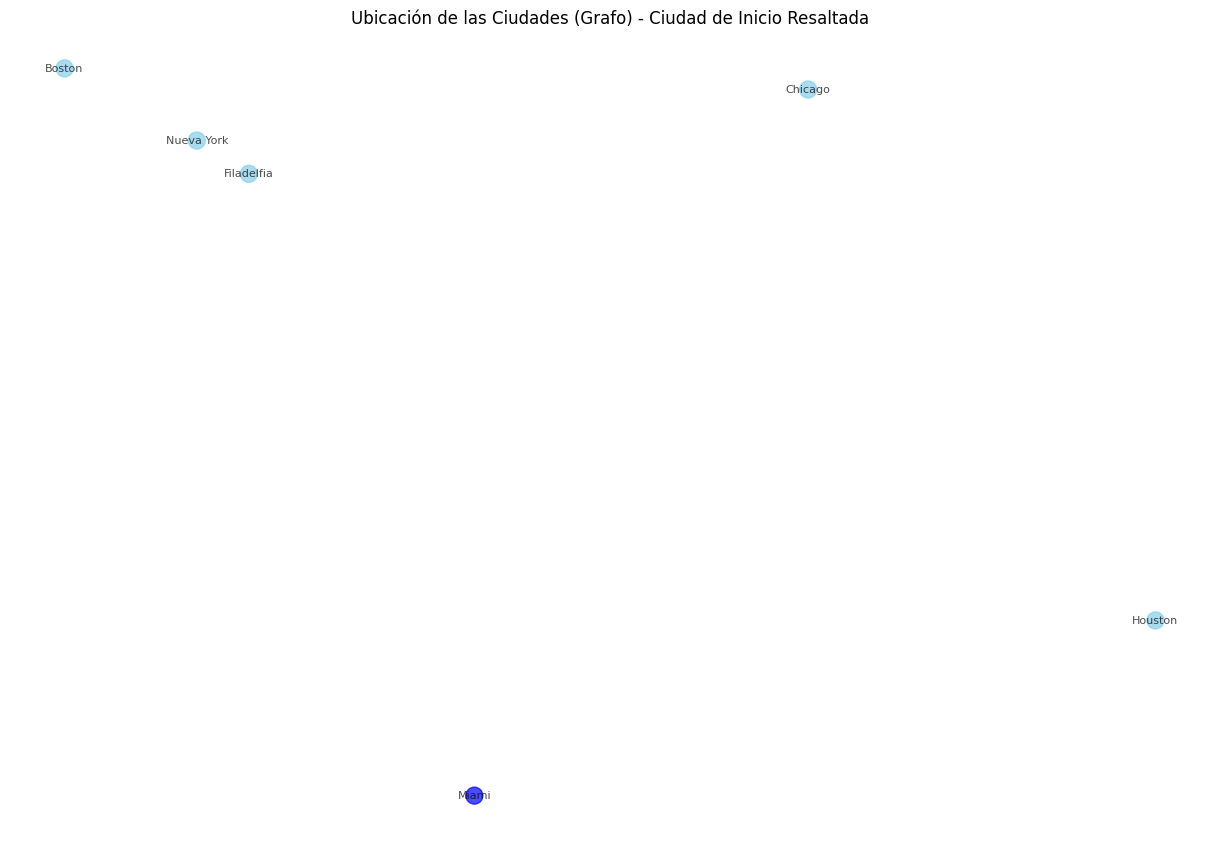

La ciudad de inicio resaltada en azul es: Miami


In [ ]:
# En el gráfico anterior identificar cual es la ciudad donde arranca con un color

# Get the name of the starting city
starting_city_name = df[df['Ciudad_inicio'] == 1]['Ciudad'].iloc[0]

# Create node colors: blue for the starting city, default for others
node_colors = ['blue' if node == starting_city_name else 'skyblue' for node in G.nodes()]

# Draw the graph with highlighted starting city
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=150, font_size=8, edge_color='gray', alpha=0.7, node_color=node_colors)
plt.title("Ubicación de las Ciudades (Grafo) - Ciudad de Inicio Resaltada")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()

print(f"La ciudad de inicio resaltada en azul es: {starting_city_name}")


Matriz de Distancias entre Ciudades:
Boston:
  -> Miami: 18.95
  -> Houston: 27.38
  -> Chicago: 16.58
  -> Filadelfia: 4.76
  -> Nueva York: 3.38
Miami:
  -> Boston: 18.95
  -> Houston: 15.70
  -> Chicago: 17.75
  -> Filadelfia: 15.05
  -> Nueva York: 16.18
Houston:
  -> Boston: 27.38
  -> Miami: 15.70
  -> Chicago: 14.38
  -> Filadelfia: 22.63
  -> Nueva York: 24.01
Chicago:
  -> Boston: 16.58
  -> Miami: 17.75
  -> Houston: 14.38
  -> Filadelfia: 12.61
  -> Nueva York: 13.67
Filadelfia:
  -> Boston: 4.76
  -> Miami: 15.05
  -> Houston: 22.63
  -> Chicago: 12.61
  -> Nueva York: 1.39
Nueva York:
  -> Boston: 3.38
  -> Miami: 16.18
  -> Houston: 24.01
  -> Chicago: 13.67
  -> Filadelfia: 1.39


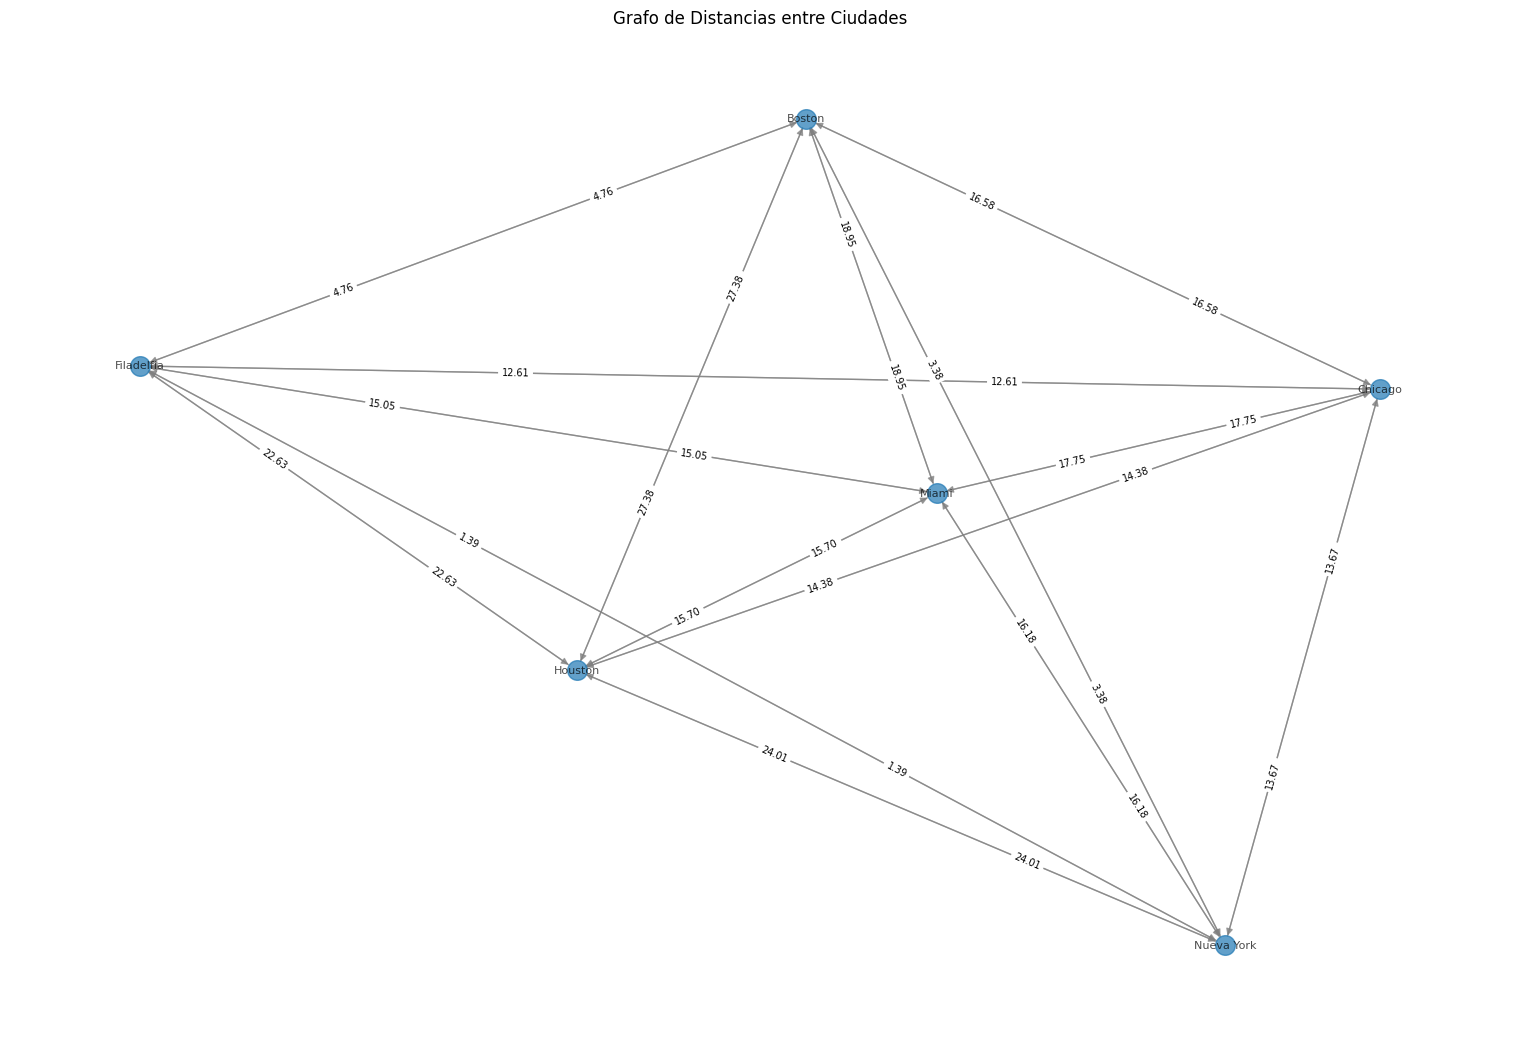


Distancias desde la ciudad de inicio (Miami):
  -> Boston: 18.95
  -> Houston: 15.70
  -> Chicago: 17.75
  -> Filadelfia: 15.05
  -> Nueva York: 16.18


In [ ]:
# Se genera un grafo con las distancias desde la ciudad de inicio a las otras ciudades

from scipy.spatial.distance import euclidean

# Calculate the distance matrix
cities = df['Ciudad'].tolist()
coords = df[[' Longitud', 'Latitud']].values # Use (lon, lat) as per graph plotting

distance_matrix = {}
for i in range(len(cities)):
    distance_matrix[cities[i]] = {}
    for j in range(len(cities)):
        if i != j:
            dist = euclidean(coords[i], coords[j])
            distance_matrix[cities[i]][cities[j]] = dist

# Create a new graph to represent the distances
G_dist = nx.DiGraph() # Use DiGraph if movement direction matters, otherwise Graph

# Add nodes
G_dist.add_nodes_from(cities)

# Add edges with calculated distances as weights
for city1, distances in distance_matrix.items():
    for city2, dist in distances.items():
        G_dist.add_edge(city1, city2, weight=dist)

# Print the distance matrix (optional)
print("Matriz de Distancias entre Ciudades:")
for city1, distances in distance_matrix.items():
    print(f"{city1}:")
    for city2, dist in distances.items():
        print(f"  -> {city2}: {dist:.2f}")

# You can optionally visualize this new graph with edge weights
plt.figure(figsize=(15, 10))
pos_dist = nx.spring_layout(G_dist) # Use a different layout for distance graph visualization
nx.draw(G_dist, pos_dist, with_labels=True, node_size=200, font_size=8, edge_color='gray', alpha=0.7)
edge_labels = nx.get_edge_attributes(G_dist, 'weight')
# Format edge labels to show 2 decimal places
formatted_edge_labels = {k: f"{v:.2f}" for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G_dist, pos_dist, edge_labels=formatted_edge_labels, font_size=7, label_pos=0.3)
plt.title("Grafo de Distancias entre Ciudades")
plt.show()

# Create a dictionary of distances from the starting city
starting_city_name = df[df['Ciudad_inicio'] == 1]['Ciudad'].iloc[0]
distances_from_start = distance_matrix.get(starting_city_name, {})

print(f"\nDistancias desde la ciudad de inicio ({starting_city_name}):")
for city, dist in distances_from_start.items():
    print(f"  -> {city}: {dist:.2f}")


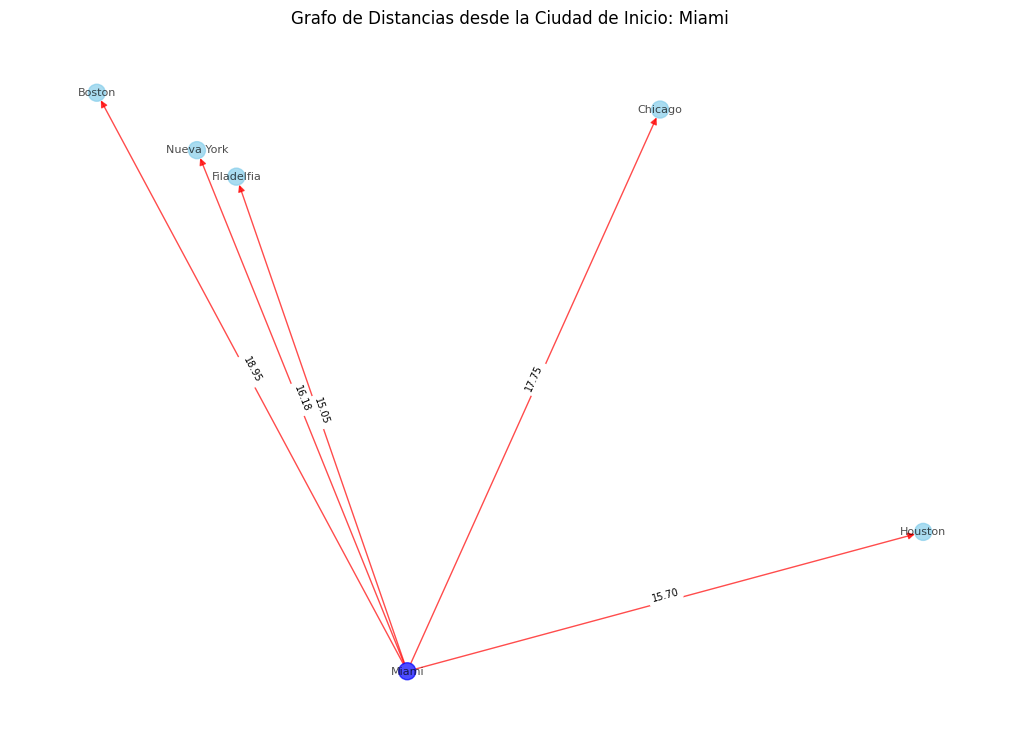

Grafo generado mostrando solo las distancias desde la ciudad de inicio: Miami


In [ ]:
# Se genera un grafo con las distancias únicamente de la ciudad inicio a las otras ciudades

# Create a new graph containing only edges from the starting city
G_start = nx.DiGraph() # Using DiGraph as we're considering paths from a specific start

# Add nodes from the original graph
G_start.add_nodes_from(G.nodes())

# Get the name of the starting city again
starting_city_name = df[df['Ciudad_inicio'] == 1]['Ciudad'].iloc[0]

# Add edges from the starting city to all other cities with the calculated distances as weights
if starting_city_name in distance_matrix:
    for city, dist in distance_matrix[starting_city_name].items():
        G_start.add_edge(starting_city_name, city, weight=dist)

# Visualize the new graph containing only distances from the starting city
plt.figure(figsize=(10, 7))
# Reuse the original geographic positions for consistency
pos_start = nx.get_node_attributes(G, 'pos')

# Ensure all nodes from the original graph that are present in G_start have a position
# This handles cases where a city might have been removed if its coordinates were invalid
valid_pos_start = {node: pos_start[node] for node in G_start.nodes() if node in pos_start}


# Highlight the starting node
node_colors_start = ['blue' if node == starting_city_name else 'skyblue' for node in G_start.nodes()]


nx.draw(G_start, valid_pos_start, with_labels=True, node_size=150, font_size=8, edge_color='red', alpha=0.7, node_color=node_colors_start)

# Add edge labels (distances)
edge_labels_start = nx.get_edge_attributes(G_start, 'weight')
formatted_edge_labels_start = {k: f"{v:.2f}" for k, v in edge_labels_start.items()}
nx.draw_networkx_edge_labels(G_start, valid_pos_start, edge_labels=formatted_edge_labels_start, font_size=7, label_pos=0.5, verticalalignment='baseline')


plt.title(f"Grafo de Distancias desde la Ciudad de Inicio: {starting_city_name}")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()

print(f"Grafo generado mostrando solo las distancias desde la ciudad de inicio: {starting_city_name}")


In [ ]:
# Se genera en ENCODER  para el rpoblema del TSP optimization

class GraphAttentionEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_heads):
        super(GraphAttentionEncoder, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_heads = num_heads

        # Linear projection for input features
        self.W_v = nn.Linear(input_dim, hidden_dim * num_heads, bias=False)
        self.W_k = nn.Linear(input_dim, hidden_dim * num_heads, bias=False)
        self.W_q = nn.Linear(input_dim, hidden_dim * num_heads, bias=False)
        self.W_out = nn.Linear(hidden_dim * num_heads, input_dim) # Project back to original dimension for residual connection

        self.norm = nn.LayerNorm(input_dim) # Layer normalization
        self.dropout = nn.Dropout(0.1) # Dropout

    def forward(self, x, mask=None):
        # x: (batch_size, num_cities, input_dim)
        batch_size, num_cities, _ = x.size()

        # Project input
        v = self.W_v(x).view(batch_size, num_cities, self.num_heads, self.hidden_dim)
        k = self.W_k(x).view(batch_size, num_cities, self.num_heads, self.hidden_dim)
        q = self.W_q(x).view(batch_size, num_cities, self.num_heads, self.hidden_dim)

        # Transpose for batch matrix multiplication: (batch_size, num_heads, num_cities, hidden_dim)
        v = v.transpose(1, 2)
        k = k.transpose(1, 2)
        q = q.transpose(1, 2)

        # Scaled Dot-Product Attention
        # (batch_size, num_heads, num_cities, num_cities)
        attention_scores = torch.matmul(q, k.transpose(-2, -1)) / math.sqrt(self.hidden_dim)

        if mask is not None:
            # Apply mask (for preventing attention to padding or future elements)
            # mask shape: (batch_size, 1, num_cities, num_cities) or (batch_size, num_cities, num_cities)
            attention_scores = attention_scores.masked_fill(mask == 0, float('-inf'))

        attention_weights = F.softmax(attention_scores, dim=-1)
        attention_weights = self.dropout(attention_weights) # Apply dropout after softmax

        # (batch_size, num_heads, num_cities, hidden_dim)
        output = torch.matmul(attention_weights, v)

        # Concatenate heads: (batch_size, num_cities, num_heads * hidden_dim)
        output = output.transpose(1, 2).contiguous().view(batch_size, num_cities, self.num_heads * self.hidden_dim)

        # Final linear projection and residual connection
        output = self.W_out(output)
        output = x + output # Residual connection

        # Layer normalization
        output = self.norm(output)

        return output, attention_weights



In [ ]:
# Mostrar el resultado en encoder en tabla

import math # Import the math module if not already imported
encoder = GraphAttentionEncoder(input_dim=3, hidden_dim=64, num_heads=8)

# Prepare dummy input data for demonstration
# batch_size = 1 (for a single set of cities)
# num_cities = number of cities in your DataFrame
# input_dim = number of features per city (e.g., Latitude, Longitude, Cost/City_inicio)

# Example: using Latitude, Longitude, and Ciudad_inicio from the DataFrame
# Ensure the columns exist and are numeric
features = df[['Latitud', ' Longitud', 'Ciudad_inicio']].values
# Convert numpy array to torch tensor and add a batch dimension
input_data = torch.tensor(features, dtype=torch.float32).unsqueeze(0).to(device) # Add batch_size dimension and move to device

# Pass the input through the encoder
with torch.no_grad(): # Disable gradient calculation for inference
    encoded_output, attention_weights = encoder(input_data)

# The encoded_output is a tensor of shape (batch_size, num_cities, input_dim)
# For display, we can squeeze the batch dimension if batch_size is 1
encoded_output_squeezed = encoded_output.squeeze(0).cpu().numpy() # Move back to CPU and convert to numpy

# Create a DataFrame to display the encoded output
encoded_df = pd.DataFrame(encoded_output_squeezed, columns=[f'Encoded_Feature_{i+1}' for i in range(encoded_output_squeezed.shape[1])])

# Add the city names for context
encoded_df.insert(0, 'Ciudad', df['Ciudad'].values)

print("Resultado del Encoder (Representación Codificada de las Ciudades):")
display(encoded_df)

# Optionally, display the attention weights (for the first city in the batch and the first head)
# Attention weights shape: (batch_size, num_heads, num_cities, num_cities)
# This shows how much each city attends to every other city for a specific head
print("\nPesos de Atención (ejemplo del primer head):")
# Select the attention weights for the first item in the batch and the first head
attention_weights_example = attention_weights[0, 0, :, :].cpu().numpy()

# Create a DataFrame for attention weights
attention_df = pd.DataFrame(attention_weights_example, index=df['Ciudad'].values, columns=df['Ciudad'].values)
display(attention_df)

Resultado del Encoder (Representación Codificada de las Ciudades):


,Ciudad,Encoded_Feature_1,Encoded_Feature_2,Encoded_Feature_3
0,Boston,0.743009,0.670586,-1.413595
1,Miami,0.537243,0.864307,-1.401550
2,Houston,0.466786,0.922714,-1.389500
3,Chicago,0.561495,0.843326,-1.404822
4,Filadelfia,0.669100,0.744444,-1.413544
5,Nueva York,0.691837,0.722268,-1.414104



Pesos de Atención (ejemplo del primer head):


,Boston,Miami,Houston,Chicago,Filadelfia,Nueva York
Boston,1.111111,0.0,0.0,0.0,0.000000e+00,0.000000e+00
Miami,0.000000,0.0,0.0,0.0,2.274166e-20,1.068203e-14
Houston,1.111111,0.0,0.0,0.0,2.798846e-24,0.000000e+00
Chicago,1.111111,0.0,0.0,0.0,1.417482e-25,2.058666e-18
Filadelfia,1.111111,0.0,0.0,0.0,0.000000e+00,1.583538e-16
Nueva York,1.111111,0.0,0.0,0.0,6.931627e-23,1.685667e-16


In [ ]:
# Generar el DECODER

class AttentionDecoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_heads, num_cities):
        super(AttentionDecoder, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_heads = num_heads
        self.num_cities = num_cities

        # Query projection for the current node embedding
        self.W_q = nn.Linear(input_dim, hidden_dim * num_heads, bias=False)

        # Key and Value projections for the encoded city features
        # These can be shared across time steps
        self.W_k = nn.Linear(input_dim, hidden_dim * num_heads, bias=False)
        self.W_v = nn.Linear(input_dim, hidden_dim * num_heads, bias=False)

        # Linear projection to combine heads
        self.W_out = nn.Linear(hidden_dim * num_heads, hidden_dim) # Project to hidden_dim

        # Softmax temperature (controls the peakiness of the distribution)
        self.temp = 1.0

    def forward(self, current_node_embedding, encoded_features, visited_mask=None):
        # current_node_embedding: (batch_size, input_dim) - Embedding of the last visited city
        # encoded_features: (batch_size, num_cities, input_dim) - Output from the encoder
        # visited_mask: (batch_size, num_cities) - Boolean mask, True if city is visited

        batch_size = current_node_embedding.size(0)

        # Project current node embedding: (batch_size, num_heads, hidden_dim)
        q = self.W_q(current_node_embedding).view(batch_size, self.num_heads, self.hidden_dim)
        q = q.unsqueeze(2) # Add a dimension for broadcasting: (batch_size, num_heads, 1, hidden_dim)

        # Project encoded features (keys and values) - can be pre-calculated outside if features are static
        # (batch_size, num_cities, num_heads, hidden_dim)
        k = self.W_k(encoded_features).view(batch_size, self.num_cities, self.num_heads, self.hidden_dim)
        v = self.W_v(encoded_features).view(batch_size, self.num_cities, self.num_heads, self.hidden_dim)

        # Transpose for batch matrix multiplication
        # (batch_size, num_heads, num_cities, hidden_dim)
        k = k.transpose(1, 2)
        v = v.transpose(1, 2)

        # Calculate attention scores
        # (batch_size, num_heads, 1, hidden_dim) x (batch_size, num_heads, hidden_dim, num_cities)
        # -> (batch_size, num_heads, 1, num_cities)
        attention_scores = torch.matmul(q, k.transpose(-2, -1)) / math.sqrt(self.hidden_dim)
        attention_scores = attention_scores.squeeze(2) # Remove the singleton dimension: (batch_size, num_heads, num_cities)

        # Apply temperature
        attention_scores = attention_scores / self.temp

        # Apply mask to prevent attending to visited cities
        if visited_mask is not None:
            # visited_mask: (batch_size, num_cities)
            # Expand mask to match attention_scores dimensions: (batch_size, num_heads, num_cities)
            mask_expanded = visited_mask.unsqueeze(1).expand_as(attention_scores)
            attention_scores = attention_scores.masked_fill(mask_expanded, float('-inf')) # Mask visited cities

        # Get logits (unnormalized probabilities) for the next city
        # Combine scores from all heads
        # Sum or average over heads (sum is common)
        logits = torch.sum(attention_scores, dim=1) # (batch_size, num_cities)

        return logits


# Instantiate the Decoder
decoder = AttentionDecoder(input_dim=encoded_output.size(-1), # Use the dimension of the encoded features
                           hidden_dim=64, # Can be the same as encoder hidden_dim or different
                           num_heads=8,   # Can be the same as encoder num_heads or different
                           num_cities=encoded_output.size(1)).to(device) # Number of cities

# --- Example Usage ---

# Assuming encoded_output is the output from the encoder (batch_size, num_cities, input_dim)
# Let's simulate the first step of decoding.
# We need to know the starting city.
# In the TSP, the starting city is typically fixed.
# Find the index of the starting city in the encoded_features tensor.
# This assumes the order of cities in `encoded_features` is the same as in your `df`.

# Find the starting city name
starting_city_name = df[df['Ciudad_inicio'] == 1]['Ciudad'].iloc[0]

# Find the index of the starting city in the current DataFrame (df)
starting_city_idx_in_df = df[df['Ciudad'] == starting_city_name].index[0]

# Since we selected a subset of cities into `new_df` which became the current `df`,
# we need to find its index within this new `df`.
# The .index property of the filtered df already gives the index relative to the *original* df.
# If you reset the index of new_df, you would need to find the index differently.
# Assuming df is `new_df` with original indices preserved or mapped.
# A safer way is to find the positional index within the current `df`:
starting_city_pos_in_df = df.index.get_loc(starting_city_idx_in_df)


print(f"\nStarting city for decoding: {starting_city_name} (Positional Index in current DataFrame: {starting_city_pos_in_df})")

# Get the embedding of the starting city from the encoded features
# encoded_output shape: (batch_size, num_cities, input_dim)
# We need to select the embedding for the starting city for each item in the batch.
# For a single batch item (batch_size = 1):
current_node_embedding = encoded_output[:, starting_city_pos_in_df, :] # (batch_size, input_dim)

# Initialize visited mask. Initially, only the starting city is visited.
# visited_mask shape: (batch_size, num_cities)
visited_mask = torch.zeros(encoded_output.size(0), encoded_output.size(1), dtype=torch.bool).to(device)
visited_mask[:, starting_city_pos_in_df] = True

print("\nSimulating first step of decoding...")
# Pass current node embedding, encoded features, and visited mask to the decoder
with torch.no_grad():
    logits = decoder(current_node_embedding, encoded_output, visited_mask=visited_mask)

# The logits represent the unnormalized probabilities for visiting each city next.
# Higher logits mean a higher probability of being selected.
# Cities that are masked (visited) will have very low (theoretically -inf) logits.

print("\nLogits for the next city (before softmax):")
# Convert logits to numpy for display
logits_squeezed = logits.squeeze(0).cpu().numpy()

# Create a DataFrame to display the logits with city names
logits_df = pd.DataFrame({'Ciudad': df['Ciudad'].values, 'Logits': logits_squeezed})

# Sort by logits to see the most likely next cities
logits_df_sorted = logits_df.sort_values(by='Logits', ascending=False)

display(logits_df_sorted)

# To get actual probabilities, apply softmax
probabilities = F.softmax(logits, dim=-1)

print("\nProbabilities for the next city (after softmax):")
probabilities_squeezed = probabilities.squeeze(0).cpu().numpy()

probabilities_df = pd.DataFrame({'Ciudad': df['Ciudad'].values, 'Probability': probabilities_squeezed})
probabilities_df_sorted = probabilities_df.sort_values(by='Probability', ascending=False)

display(probabilities_df_sorted)

# The decoding process would continue by sampling from these probabilities
# (e.g., using Gumbel-softmax during training, or multinomial sampling during inference)
# and updating the current_node_embedding and visited_mask. This is typically done within a loop.



Starting city for decoding: Miami (Positional Index in current DataFrame: 1)

Simulating first step of decoding...

Logits for the next city (before softmax):


,Ciudad,Logits
2,Houston,-0.345691
3,Chicago,-0.453577
4,Filadelfia,-0.577383
5,Nueva York,-0.603724
0,Boston,-0.663259
1,Miami,-inf



Probabilities for the next city (after softmax):


,Ciudad,Probability
2,Houston,0.238583
3,Chicago,0.214183
4,Filadelfia,0.189242
5,Nueva York,0.184322
0,Boston,0.173669
1,Miami,0.000000



Simulating full decoding process to get a TSP tour...

Simulated TSP Tour:
Miami -> Houston -> Chicago -> Filadelfia -> Nueva York -> Boston -> Miami

Generating graph visualization of the simulated tour...

Total estimated tour distance: 66.39


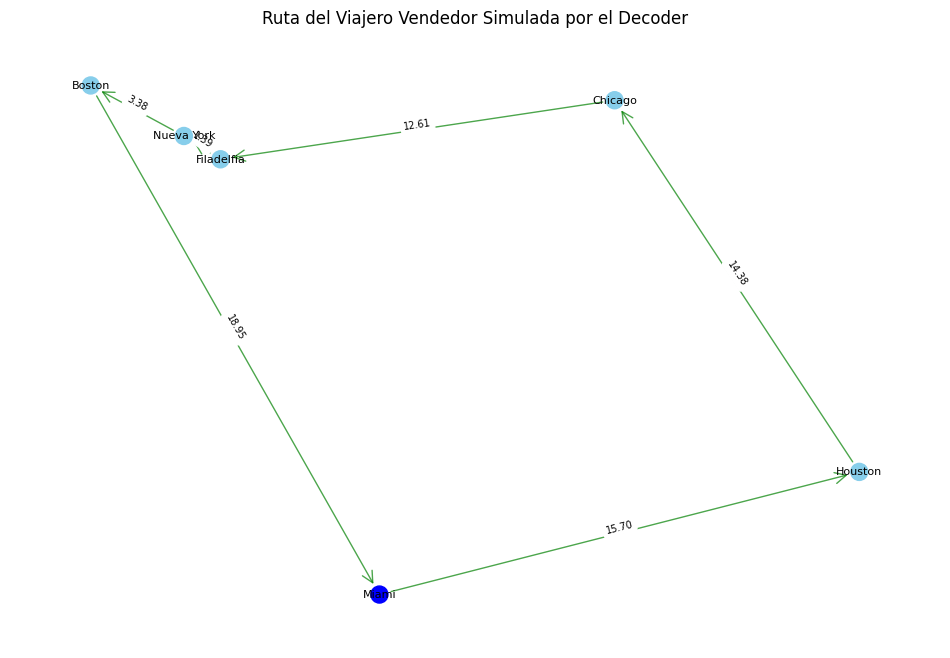

Visualización del grafo de la ruta simulada generada por el decoder completada.


In [ ]:
# Se generar el grafo con el resultado del DECODER

# Simulate the decoding process to get a path (sequence of visited cities)
print("\nSimulating full decoding process to get a TSP tour...")

tour = []
current_city_pos = starting_city_pos_in_df
tour.append(df['Ciudad'].iloc[current_city_pos])

# Initialize visited mask and current node embedding
visited_mask = torch.zeros(encoded_output.size(0), encoded_output.size(1), dtype=torch.bool).to(device)
visited_mask[:, current_city_pos] = True
current_node_embedding = encoded_output[:, current_city_pos, :]

# Loop until all cities are visited
with torch.no_grad():
    for _ in range(df.shape[0] - 1): # We visit num_cities - 1 more cities after the start
        # Get logits for the next city
        logits = decoder(current_node_embedding, encoded_output, visited_mask=visited_mask)

        # Sample the next city (for inference, using multinomial sampling is common)
        # For demonstration, let's just pick the city with the highest probability (greedy approach)
        probabilities = F.softmax(logits, dim=-1)
        next_city_probs, next_city_indices_tensor = torch.max(probabilities, dim=-1) # (batch_size,)

        # Get the index of the next city in the current batch
        next_city_pos = next_city_indices_tensor.squeeze().item() # Get the scalar index

        # Add the selected city to the tour
        next_city_name = df['Ciudad'].iloc[next_city_pos]
        tour.append(next_city_name)

        # Update the visited mask
        visited_mask[:, next_city_pos] = True

        # Update the current node embedding
        current_node_embedding = encoded_output[:, next_city_pos, :]

# Add the starting city at the end to complete the tour
tour.append(starting_city_name)

print("\nSimulated TSP Tour:")
print(" -> ".join(tour))

# --- Visualize the Generated Tour ---

print("\nGenerating graph visualization of the simulated tour...")

# Create a directed graph for the tour
G_tour = nx.DiGraph()

# Add nodes with original geographic positions
pos = nx.get_node_attributes(G, 'pos')
G_tour.add_nodes_from(G.nodes())

# Add edges representing the tour sequence
tour_edges = []
tour_distance = 0.0
for i in range(len(tour) - 1):
    city1 = tour[i]
    city2 = tour[i+1]
    G_tour.add_edge(city1, city2)
    # Find the distance between these two cities
    # Need to look up distance in the distance_matrix
    if city1 in distance_matrix and city2 in distance_matrix[city1]:
        distance = distance_matrix[city1][city2]
        G_tour[city1][city2]['weight'] = distance
        tour_distance += distance
        tour_edges.append(((city1, city2), distance)) # Store edge and distance for label

print(f"\nTotal estimated tour distance: {tour_distance:.2f}")


plt.figure(figsize=(12, 8))

# Draw nodes
# Highlight the starting city
node_colors_tour = ['blue' if node == starting_city_name else 'skyblue' for node in G_tour.nodes()]
nx.draw_networkx_nodes(G_tour, pos, node_size=150, node_color=node_colors_tour)

# Draw edges with arrows
nx.draw_networkx_edges(G_tour, pos, edgelist=G_tour.edges(), edge_color='green', arrowstyle='->', arrowsize=20, alpha=0.7)

# Draw labels
nx.draw_networkx_labels(G_tour, pos, font_size=8)

# Draw edge labels (distances)
# Need to re-create the edge_labels dictionary from tour_edges
tour_edge_labels = {(u, v): f"{d:.2f}" for (u, v), d in tour_edges}
nx.draw_networkx_edge_labels(G_tour, pos, edge_labels=tour_edge_labels, font_size=7, label_pos=0.5, verticalalignment='baseline')


plt.title("Ruta del Viajero Vendedor Simulada por el Decoder")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.axis('off') # Turn off the axis
plt.show()

print("Visualización del grafo de la ruta simulada generada por el decoder completada.")


# ALGORITHMS WITHOUTH TRANSFORMES:

##[1].- Brute-Force (Fuerza Bruta)
-----------------------------------------

In [ ]:
# Sacarle una copia a df y  programar un algorithmo Brute-Force (Fuerza Bruta) para hallar la ruta mas eficiente entre las ciudades escogidas

import itertools
import math

def calculate_distance(city1_coords, city2_coords):
    """Calculates the Euclidean distance between two cities."""
    return math.sqrt((city1_coords[0] - city2_coords[0])**2 + (city1_coords[1] - city2_coords[1])**2)

def calculate_total_distance(permutation, city_coords_tensor):
    """Calculates the total distance of a given city permutation."""
    total_dist = 0
    for i in range(len(permutation) - 1):
        city1_index = permutation[i]
        city2_index = permutation[i+1]
        total_dist += calculate_distance(city_coords_tensor[city1_index], city_coords_tensor[city2_index])
    # Add distance from the last city back to the starting city
    total_dist += calculate_distance(city_coords_tensor[permutation[-1]], city_coords_tensor[permutation[0]])
    return total_dist

def brute_force_tsp(city_coords_tensor, start_node_index):
    """
    Implements the Brute Force algorithm to find the optimal TSP path.

    Args:
        city_coords_tensor (torch.Tensor): A tensor of city coordinates.
        start_node_index (int): The index of the starting city.

    Returns:
        tuple: A tuple containing the best path (list of city indices) and the minimum distance.
    """
    num_cities = city_coords_tensor.shape[0]
    # Create a list of indices for all cities
    city_indices = list(range(num_cities))

    # Remove the starting city from the list of indices to permute
    indices_to_permute = city_indices[:start_node_index] + city_indices[start_node_index+1:]

    min_distance = float('inf')
    best_path = None

    # Iterate through all permutations of the remaining cities
    for permutation_tuple in itertools.permutations(indices_to_permute):
        # Construct the full path including the starting city at the beginning and end
        current_path = [start_node_index] + list(permutation_tuple)

        # Calculate the total distance for the current path
        current_distance = calculate_total_distance(current_path, city_coords_tensor)

        # Update the minimum distance and best path if the current path is shorter
        if current_distance < min_distance:
            min_distance = current_distance
            best_path = current_path

    return best_path, min_distance

# Make a copy of the DataFrame to work with
df_copy = df.copy()

# Find the index of the starting city in the current DataFrame
start_city_name = df_copy[df_copy['Ciudad_inicio'] == 1]['Ciudad'].iloc[0]
start_node_index_in_current_df = df_copy[df_copy['Ciudad'] == start_city_name].index[0]
# Since the index is reset when converting to tensor, we need the index relative to the tensor
start_node_index_in_tensor = df_copy.index.get_loc(start_node_index_in_current_df)


print(f"\nRunning Brute Force TSP starting from city index: {start_node_index_in_tensor}")

# Run the Brute Force algorithm
best_route_indices, shortest_distance = brute_force_tsp(city_coords, start_node_index_in_tensor)

# Map indices back to city names
best_route_cities = [df_copy.iloc[i]['Ciudad'] for i in best_route_indices]
# Add the starting city at the end to complete the cycle for display
best_route_cities_display = best_route_cities + [best_route_cities[0]]


print("\nShortest distance found by Brute Force:", shortest_distance)
print("Best route (cities):", " -> ".join(best_route_cities_display))

# Optional: Visualize the best route
G_route = nx.DiGraph() # Use a directed graph to show the route direction

# Add nodes with positions from the original pos dictionary (consistent with the previous plot)
for index, row in df_copy.iterrows():
    city = row['Ciudad']
    # Find the corresponding position in the original pos dictionary
    original_pos = pos.get(city)
    if original_pos:
        G_route.add_node(city, pos=original_pos)

# Add edges for the best route
for i in range(len(best_route_cities)):
    city1 = best_route_cities[i]
    city2 = best_route_cities[(i + 1) % len(best_route_cities)] # Wrap around for the last edge
    G_route.add_edge(city1, city2)

route_pos = nx.get_node_attributes(G_route, 'pos')

plt.figure(figsize=(12, 8))
nx.draw(G_route, route_pos, with_labels=True, node_size=500, font_size=10,
        edge_color='red', width=1, alpha=0.7, arrowsize=20)
plt.title("Ruta Óptima (Fuerza Bruta)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()



Running Brute Force TSP starting from city index: 2


KeyboardInterrupt: 

##[2].- Programación Dinámica (Algoritmo de Held-Karp)
---------------------------------------------------------------------

In [ ]:
# Sacarle copia al dataframe df y hacer un programa para Programación Dinámica (Algoritmo de Held-Karp) que saque la ruta más optima

import numpy as np

def held_karp(city_coords_tensor, start_node_index):
    """
    Implements the Held-Karp algorithm (Dynamic Programming) for TSP.

    Args:
        city_coords_tensor (torch.Tensor): A tensor of city coordinates.
        start_node_index (int): The index of the starting city.

    Returns:
        tuple: A tuple containing the minimum distance and the best path (list of city indices).
               Returns (None, None) if the number of cities is too large (computationally infeasible).
    """
    num_cities = city_coords_tensor.shape[0]

    if num_cities > 20: # Held-Karp is O(n^2 * 2^n), becomes very slow quickly
        print("Warning: Number of cities is large. Held-Karp may take a very long time.")
        return None, None

    # Calculate the distance matrix
    dist_matrix = torch.cdist(city_coords_tensor, city_coords_tensor, p=2).numpy() # Use Euclidean distance

    # dp state: dp[mask][j] is the minimum distance to visit all cities in 'mask',
    # ending at city 'j'. The starting city is implicitly included if its bit is set in the mask.
    # We'll use the starting city (index 'start_node_index') as the base for the mask.
    # The mask will represent the set of cities visited EXCLUDING the start city.
    # The cities will be re-indexed for the DP table to exclude the start city.
    # New indices will be 0 to num_cities-2. The original start_node_index is mapped to -1 conceptually.

    # Create mapping from original index to DP index (0 to num_cities-2)
    original_indices = list(range(num_cities))
    dp_indices = [i for i in range(num_cities) if i != start_node_index]
    original_to_dp = {original_indices[i]: dp_indices.index(original_indices[i]) if original_indices[i] != start_node_index else -1 for i in range(num_cities)}
    dp_to_original = {v: k for k, v in original_to_dp.items() if v != -1}

    # Number of cities in the DP state (excluding the starting city)
    n_dp = num_cities - 1

    # dp table: dp[mask][j]
    # mask: 2^n_dp bits, where each bit represents a city *other than* the start node.
    # j: city index in the DP index space (0 to n_dp-1) representing the END city.
    dp = np.full((1 << n_dp, n_dp), np.inf)

    # path table: Store predecessors to reconstruct the path
    # path[mask][j] stores the previous city (in DP index) before reaching city j with mask.
    path = np.full((1 << n_dp, n_dp), -1, dtype=int)

    # Base case: Starting from the start city and moving to one of the other cities.
    # The mask will have only the bit corresponding to the destination city set.
    # The cost is the distance from the start city to that destination city.
    for i in range(n_dp):
        # Original index of the destination city
        orig_dest_index = dp_to_original[i]
        mask = (1 << i) # Mask with only the i-th bit set
        dp[mask][i] = dist_matrix[start_node_index][orig_dest_index]

    # Iterate through masks from size 2 up to num_cities-1
    for mask_size in range(2, n_dp + 1):
        # Iterate through all possible masks of the current size
        for mask in range(1 << n_dp):
            if bin(mask).count('1') == mask_size:
                # Iterate through all destination cities 'j' in the current mask
                for j in range(n_dp):
                    # Check if city j is in the current mask
                    if (mask >> j) & 1:
                        # Consider the mask without city j
                        prev_mask = mask ^ (1 << j)
                        orig_j_index = dp_to_original[j]

                        # Iterate through all possible previous cities 'k' in prev_mask
                        for k in range(n_dp):
                            # Check if city k is in the previous mask
                            if (prev_mask >> k) & 1:
                                orig_k_index = dp_to_original[k]
                                # Calculate the cost of coming from k to j
                                cost = dp[prev_mask][k] + dist_matrix[orig_k_index][orig_j_index]

                                # Update DP table and path table if a shorter path is found
                                if cost < dp[mask][j]:
                                    dp[mask][j] = cost
                                    path[mask][j] = k # Store the DP index of the previous city

    # Final step: Find the minimum cost to return to the starting city from all cities.
    # The mask should include all cities (all bits set).
    final_mask = (1 << n_dp) - 1
    min_distance = np.inf
    last_city_dp_index = -1 # The DP index of the last city before returning to the start

    for j in range(n_dp):
        # Cost from the last city j back to the start city
        orig_j_index = dp_to_original[j]
        cost = dp[final_mask][j] + dist_matrix[orig_j_index][start_node_index]

        if cost < min_distance:
            min_distance = cost
            last_city_dp_index = j # Store the DP index of the last city

    # Reconstruct the path
    best_path_dp_indices = []
    current_mask = final_mask
    current_city_dp_index = last_city_dp_index

    while current_city_dp_index != -1:
        best_path_dp_indices.append(current_city_dp_index)
        prev_city_dp_index = path[current_mask][current_city_dp_index]
        current_mask = current_mask ^ (1 << current_city_dp_index) # Remove current city from mask
        current_city_dp_index = prev_city_dp_index

    # Reverse the path and convert DP indices back to original indices
    best_path_dp_indices.reverse()
    best_path_original_indices = [start_node_index] + [dp_to_original[i] for i in best_path_dp_indices]


    return min_distance, best_path_original_indices

# Make a copy of the DataFrame to work with
# df_copy is already created and used in the Brute Force section, we can reuse it.

# Find the index of the starting city in the current DataFrame (re-find it in case df_copy was modified elsewhere, although it shouldn't be)
# start_city_name is already determined from the Brute Force section
start_node_index_in_current_df = df_copy[df_copy['Ciudad'] == start_city_name].index[0]
# Convert to index relative to the tensor (which is based on the order in df_copy)
start_node_index_in_tensor_hk = df_copy.index.get_loc(start_node_index_in_current_df)


print(f"\nRunning Held-Karp TSP starting from city index: {start_node_index_in_tensor_hk}")

# Run the Held-Karp algorithm
shortest_distance_hk, best_route_indices_hk = held_karp(city_coords, start_node_index_in_tensor_hk)

if shortest_distance_hk is not None:
    # Map indices back to city names
    best_route_cities_hk = [df_copy.iloc[i]['Ciudad'] for i in best_route_indices_hk]
    # Add the starting city at the end to complete the cycle for display
    best_route_cities_display_hk = best_route_cities_hk + [best_route_cities_hk[0]]

    print("\nShortest distance found by Held-Karp:", shortest_distance_hk)
    print("Best route (cities):", " -> ".join(best_route_cities_display_hk))

    # Optional: Visualize the best route
    G_route_hk = nx.DiGraph() # Use a directed graph

    # Add nodes with positions
    for index, row in df_copy.iterrows():
        city = row['Ciudad']
        original_pos = pos.get(city) # Use positions from the initial graph drawing
        if original_pos:
            G_route_hk.add_node(city, pos=original_pos)

    # Add edges for the best route
    for i in range(len(best_route_cities_hk)):
        city1 = best_route_cities_hk[i]
        city2 = best_route_cities_hk[(i + 1) % len(best_route_cities_hk)] # Wrap around
        if city1 in G_route_hk.nodes and city2 in G_route_hk.nodes:
             G_route_hk.add_edge(city1, city2)
        else:
             print(f"Warning: Could not add edge between {city1} and {city2}. Check node creation.")


    route_pos_hk = nx.get_node_attributes(G_route_hk, 'pos')

    plt.figure(figsize=(12, 8))
    nx.draw(G_route_hk, route_pos_hk, with_labels=True, node_size=500, font_size=10,
            edge_color='blue', width=1, alpha=0.7, arrowsize=20)
    plt.title("Ruta Óptima (Held-Karp)")
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    plt.grid(True)
    plt.show()
else:
    print("\nHeld-Karp algorithm was skipped due to a large number of cities.")
```

## [3].- SIMULATED Annealing - SA
--------------------------------------------------

In [ ]:
# Sacarle copia al dataframe df y hacer un programa para Recocido Simulado (Simulated Annealing - SA) que saque la ruta más optima

def calculate_tour_length(tour, dist_matrix):
    """Calculates the total length of a tour."""
    length = 0
    num_cities = len(tour)
    for i in range(num_cities):
        length += dist_matrix[tour[i]][tour[(i + 1) % num_cities]]
    return length

def get_neighbors(tour):
    """Generates neighbors by swapping two random cities."""
    num_cities = len(tour)
    neighbor = list(tour)
    # Choose two distinct random indices to swap
    idx1, idx2 = random.sample(range(num_cities), 2)
    neighbor[idx1], neighbor[idx2] = neighbor[idx2], neighbor[idx1]
    return neighbor

def simulated_annealing(city_coords_tensor, start_node_index, initial_temperature=10000, cooling_rate=0.995, min_temperature=1):
    """
    Implements the Simulated Annealing algorithm for TSP.

    Args:
        city_coords_tensor (torch.Tensor): A tensor of city coordinates.
        start_node_index (int): The index of the starting city.
        initial_temperature (float): The starting temperature.
        cooling_rate (float): The rate at which the temperature decreases.
        min_temperature (float): The minimum temperature to stop the simulation.

    Returns:
        tuple: A tuple containing the best path (list of city indices) and the minimum distance.
    """
    num_cities = city_coords_tensor.shape[0]

    # Calculate the distance matrix
    dist_matrix = torch.cdist(city_coords_tensor, city_coords_tensor, p=2).numpy()

    # Initial solution: a random permutation starting from the start city
    city_indices = list(range(num_cities))
    indices_to_permute = [i for i in city_indices if i != start_node_index]
    random.shuffle(indices_to_permute)
    current_tour = [start_node_index] + indices_to_permute
    # Ensure the tour is a list of original indices
    current_tour = [i for i in current_tour]

    current_length = calculate_tour_length(current_tour, dist_matrix)

    best_tour = list(current_tour)
    best_length = current_length

    temperature = initial_temperature

    # SA loop
    while temperature > min_temperature:
        # Generate a neighbor solution
        neighbor_tour = get_neighbors(current_tour)
        neighbor_length = calculate_tour_length(neighbor_tour, dist_matrix)

        # Calculate the energy difference
        delta_e = neighbor_length - current_length

        # If the neighbor is better, accept it
        if delta_e < 0:
            current_tour = neighbor_tour
            current_length = neighbor_length
            # Update the best tour if the current tour is the best so far
            if current_length < best_length:
                best_tour = list(current_tour)
                best_length = current_length
        else:
            # If the neighbor is worse, accept it with a probability
            acceptance_probability = math.exp(-delta_e / temperature)
            if random.random() < acceptance_probability:
                current_tour = neighbor_tour
                current_length = neighbor_length

        # Cool down the temperature
        temperature *= cooling_rate

    return best_tour, best_length

# Make a copy of the DataFrame to work with
# df_copy is already created and used.

# Find the index of the starting city in the current DataFrame
# start_city_name is already determined.
start_node_index_in_current_df_sa = df_copy[df_copy['Ciudad_inicio'] == 1]['Ciudad'].index[0]
# Convert to index relative to the tensor (which is based on the order in df_copy)
start_node_index_in_tensor_sa = df_copy.index.get_loc(start_node_index_in_current_df_sa)


print(f"\nRunning Simulated Annealing TSP starting from city index: {start_node_index_in_tensor_sa}")

# Run the Simulated Annealing algorithm
best_route_indices_sa, shortest_distance_sa = simulated_annealing(city_coords, start_node_index_in_tensor_sa)

# Map indices back to city names
best_route_cities_sa = [df_copy.iloc[i]['Ciudad'] for i in best_route_indices_sa]
# Add the starting city at the end to complete the cycle for display
best_route_cities_display_sa = best_route_cities_sa + [best_route_cities_sa[0]]


print("\nShortest distance found by Simulated Annealing:", shortest_distance_sa)
print("Best route (cities):", " -> ".join(best_route_cities_display_sa))

# Optional: Visualize the best route
G_route_sa = nx.DiGraph() # Use a directed graph

# Add nodes with positions
for index, row in df_copy.iterrows():
    city = row['Ciudad']
    original_pos = pos.get(city) # Use positions from the initial graph drawing
    if original_pos:
        G_route_sa.add_node(city, pos=original_pos)

# Add edges for the best route
for i in range(len(best_route_cities_sa)):
    city1 = best_route_cities_sa[i]
    city2 = best_route_cities_sa[(i + 1) % len(best_route_cities_sa)] # Wrap around
    if city1 in G_route_sa.nodes and city2 in G_route_sa.nodes:
         G_route_sa.add_edge(city1, city2)
    else:
         print(f"Warning: Could not add edge between {city1} and {city2}. Check node creation.")


route_pos_sa = nx.get_node_attributes(G_route_sa, 'pos')

plt.figure(figsize=(12, 8))
nx.draw(G_route_sa, route_pos_sa, with_labels=True, node_size=500, font_size=10,
        edge_color='green', width=1, alpha=0.7, arrowsize=20)
plt.title("Ruta Óptima (Simulated Annealing)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()
